In [10]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
import os
from dotenv import load_dotenv

load_dotenv()

tiingo_api_key = os.getenv("TIINGO_API_KEY")

df = pdr.get_data_tiingo('AAPL', api_key=tiingo_api_key)

print(df)


                                   close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-12-24 00:00:00+00:00  146.83  151.55  146.59  148.15  37169232   
       2018-12-26 00:00:00+00:00  157.17  157.23  146.72  148.30  58582544   
       2018-12-27 00:00:00+00:00  156.15  156.77  150.07  155.84  53117065   
       2018-12-28 00:00:00+00:00  156.23  158.52  154.55  157.50  42291424   
       2018-12-31 00:00:00+00:00  157.74  159.36  156.48  158.53  35003466   
...                                  ...     ...     ...     ...       ...   
       2023-12-18 00:00:00+00:00  195.89  196.63  194.39  196.09  55751861   
       2023-12-19 00:00:00+00:00  196.94  196.95  195.89  196.16  40233138   
       2023-12-20 00:00:00+00:00  194.83  197.68  194.83  196.90  52242815   
       2023-12-21 00:00:00+00:00  194.68  197.08  193.50  196.10  46482549   
       2023-12-22 00:00:00+00:00  193.60  195.41  192.97  195.18

<ipython-input-10-bfd0f4009035>:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=tiingo_api_key)


In [11]:
df.to_csv('AAPL.csv')

In [12]:
!pip install python-dotenv


In [13]:
df = pd.read_csv('AAPL.csv')

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-12-24 00:00:00+00:00,146.83,151.55,146.59,148.15,37169232,35.231152,36.363693,35.173565,35.547879,148676928,0.0,1.0
1,AAPL,2018-12-26 00:00:00+00:00,157.17,157.23,146.72,148.30,58582544,37.712185,37.726581,35.204758,35.583871,234330176,0.0,1.0
2,AAPL,2018-12-27 00:00:00+00:00,156.15,156.77,150.07,155.84,53117065,37.467441,37.616207,36.008574,37.393058,212468260,0.0,1.0
3,AAPL,2018-12-28 00:00:00+00:00,156.23,158.52,154.55,157.50,42291424,37.486636,38.036111,37.083528,37.791367,169165696,0.0,1.0
4,AAPL,2018-12-31 00:00:00+00:00,157.74,159.36,156.48,158.53,35003466,37.848954,38.237665,37.546623,38.038510,140013864,0.0,1.0


In [15]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2023-12-18 00:00:00+00:00,195.89,196.63,194.39,196.09,55751861,195.89,196.63,194.39,196.09,55751861,0.0,1.0
1255,AAPL,2023-12-19 00:00:00+00:00,196.94,196.95,195.89,196.16,40233138,196.94,196.95,195.89,196.16,40233138,0.0,1.0
1256,AAPL,2023-12-20 00:00:00+00:00,194.83,197.68,194.83,196.90,52242815,194.83,197.68,194.83,196.90,52242815,0.0,1.0
1257,AAPL,2023-12-21 00:00:00+00:00,194.68,197.08,193.50,196.10,46482549,194.68,197.08,193.50,196.10,46482549,0.0,1.0
1258,AAPL,2023-12-22 00:00:00+00:00,193.60,195.41,192.97,195.18,37149570,193.60,195.41,192.97,195.18,37149570,0.0,1.0


In [16]:
df1 = df.reset_index()['close']

In [17]:
df1.shape

(1259,)

In [18]:
df1

0       146.83
1       157.17
2       156.15
3       156.23
4       157.74
         ...  
1254    195.89
1255    196.94
1256    194.83
1257    194.68
1258    193.60
Name: close, Length: 1259, dtype: float64

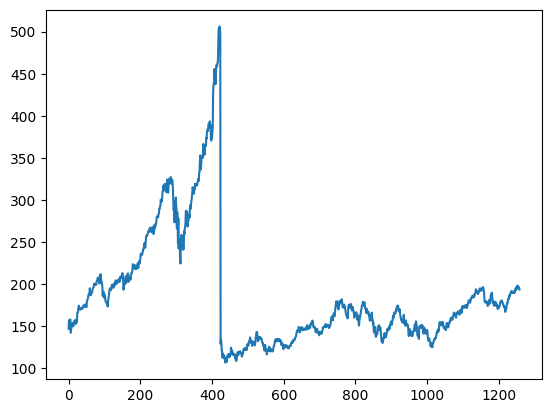

In [19]:

plt.plot(df1)

In [20]:
### lstm is sensitive to the scale of the data. apply minmax scaler

In [21]:

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1

array([[0.10016281],
       [0.12606137],
       [0.12350657],
       ...,
       [0.22038823],
       [0.22001252],
       [0.21730745]])

In [23]:
### spliting dataset into train and test split
training_size = int(len(df1)*0.7)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(881, 378)

In [28]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [29]:
time_step = 100
x_train , y_train = create_dataset(train_data, time_step)
x_test , y_test = create_dataset(test_data, time_step)

In [30]:
print(x_train)

[[0.10016281 0.12606137 0.12350657 ... 0.21059487 0.20849092 0.20578585]
 [0.12606137 0.12350657 0.12370695 ... 0.20849092 0.20578585 0.19098309]
 [0.12350657 0.12370695 0.12748904 ... 0.20578585 0.19098309 0.19977458]
 ...
 [0.13259862 0.1323732  0.13119599 ... 0.06492173 0.07160927 0.05815905]
 [0.1323732  0.13119599 0.15902317 ... 0.07160927 0.05815905 0.06191609]
 [0.13119599 0.15902317 0.17016907 ... 0.05815905 0.06191609 0.07271133]]


In [31]:
x_train.shape,x_test.shape

((780, 100), (277, 100))

In [32]:
### reshape df to 3D i.e (samples,time step,features)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [34]:
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201701 (787.89 KB)
Trainable params: 201701 (787.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 123ms/step - loss: 0.0292 - val_loss: 7.9885e-04
Epoch 2/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0091 - val_loss: 5.6970e-04
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0077 - val_loss: 0.0012
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0098 - val_loss: 5.4285e-04
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0066 - val_loss: 2.6191e-04
Epoch 6/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0056 - val_loss: 1.9973e-04
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0049 - val_loss: 2.9749e-04
Epoch 8/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0043 - val_loss: 5.0435e-04
Epoch 9/100
13/13 [==============================] - 0s 28ms/step - loss: 0.0068 - val_loss: 7.3519e-04
Epoch 10/100
13/13 [==============================] - 0s 27ms/step 

In [37]:
###prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

9/9 [==============================] - 0s 8ms/step


In [38]:
### transfrom to original from
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
### train data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

216.16275822009757

In [40]:
### test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

168.16012377363893

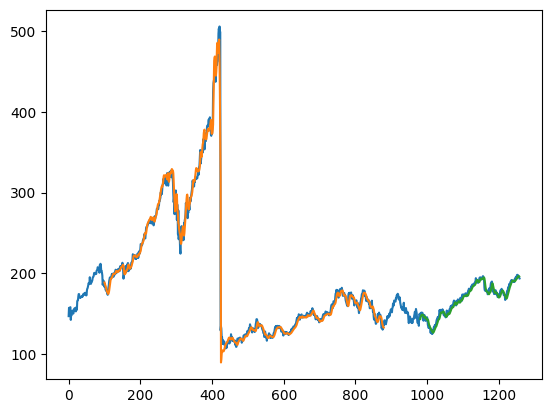

In [41]:
### plot gragh
# shift train prediction for ploting

look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

#plot baselines and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

378

In [43]:
x_input = test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [45]:
temp_input

[0.21122103944896675,
 0.1882279273638071,
 0.18036318096430803,
 0.18274264245460237,
 0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,


In [46]:
### predicting next 30 days price



lst_output=[]
n_steps=100
i=0

while(i<30):
  if (len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print temp_input
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.21999297]
101
1 day input [0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18189105 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405
 0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212
 0.17868503 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515
 0.17815905 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517
 0.16310582 0.15927364 0.15992486 0.1612273  0.16758923 0.16420789
 0.16736381 0.17049468 0.17695679 0.18071384 0.17921102 0.18274264
 0.18502192 0.18036318 0.18003757 0.1761052  0.17282405 0.17187226
 0.16541014 0.16571071 0.16681277 0.16095178 0.15040701 0.15373826
 0.15892298 0.16012523 0.16814026 0.17715717 0.17485285 0.18131497
 0.18780213 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852
 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355 0.2115717
 0.2082154  0.20776456 0.20929242 0.20671259 0.20816531 0.21139637
 0.20686287 0.21685661 0.21410144 0

In [47]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [48]:
len(df1)

1259

In [49]:
df3 = df1.tolist()
df3.extend(lst_output)

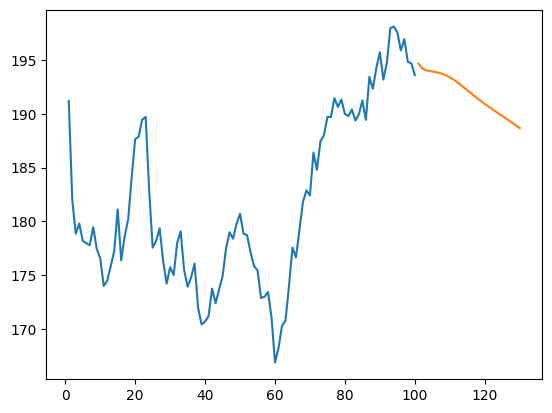

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

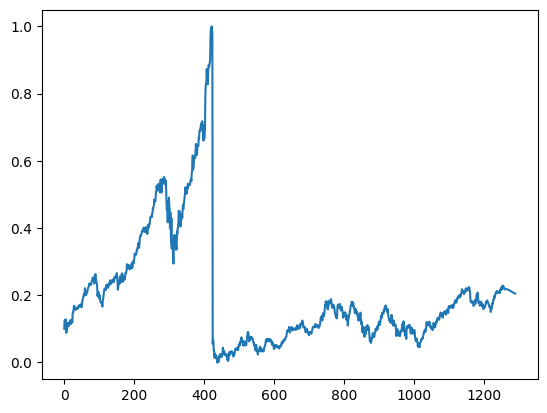

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[:])

In [52]:
model.save("stock")